In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm
import re
import numpy as np
import os

In [2]:
# 从字符串中提取纯数字部分
def extract_numeric(value):
    match = re.search(r'\d+(\.\d+)?', value)
    return float(match.group()) if match else 0.0

In [3]:
# 解析txt文件，返回用时、最大内存和子程序名称的列表
def parse_txt_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    times = []
    memories = []
    program_names = []

    for line in lines:
        parts = re.split(r'\s+', line.strip())
        program_name = parts[0].rstrip(':')
        time = extract_numeric(parts[1])
        memory = extract_numeric(parts[2])
        times.append(time)
        memories.append(memory/1024/1024)
        program_names.append(program_name)

    return times, memories, program_names

In [30]:
# 生成用时的柱状图
def plot_execution_times(txt_files, bar_names):
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    cmap = cm.get_cmap('tab10', max(len(parse_txt_file(file)[2]) for file in txt_files))
    
    for i, file_path in enumerate(txt_files):
        times, _, program_names = parse_txt_file(file_path)
        b = 0

        # 在每个柱子上堆叠子程序用时的矩形
        for j, (time, program_name) in enumerate(zip(times, program_names)):
            if i == 0:  # 左侧的柱子使用左侧Y轴刻度
                ax.bar(i, time, bottom=b, color=cmap(j))
            else:  # 右侧的柱子使用右侧Y轴刻度
                ax2.bar(i, time, bottom=b, color=cmap(j))
                ax2.set_ylim(0, 1.1 * sum(parse_txt_file(txt_files[1])[0]))  # 设置右侧Y轴的范围
            b += time

        b = 0
        # 在每个柱子上标记子程序和用时
        for j, (time, program_name) in enumerate(zip(times, program_names)):
            if i == 0:  # 左侧的柱子使用左侧Y轴刻度
                ax.text(i, b + time / 2, f"{program_name} {time:.2f} s", ha='center', va='center', color='black', fontsize=8)
            else:  # 右侧的柱子使用右侧Y轴刻度
                ax2.text(i, b + time / 2, f"{program_name} {time:.2f} s", ha='center', va='center', color='black', fontsize=8)
            b += time


    ax.set_xticks(range(len(txt_files)))
    ax.set_xticklabels(bar_names)
    ax.set_ylabel('Time spent on MC components (s)')
    ax2.set_ylabel('Time spent on pggb components (s)')

In [5]:
# 生成最大内存的折线图
def plot_memory_usage(txt_files, bar_names):
    fig, ax = plt.subplots()

    for i, file_path in enumerate(txt_files):
        _, memories, program_names = parse_txt_file(file_path)
        ax.plot(range(1, len(memories) + 1), memories, label=bar_names[i])

        # 在每个点上方添加子程序名称
        for x, y, name in zip(range(1, len(memories) + 1), memories, program_names):
            ax.text(x, y, name, ha='center', va='bottom', color='black', fontsize=8)

    ax.set_ylabel('Maximum Running Memory for Each Section (GB)')
    ax.legend()

/tmp/ipykernel_272950/4250840803.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', max(len(parse_txt_file(file)[2]) for file in txt_files))


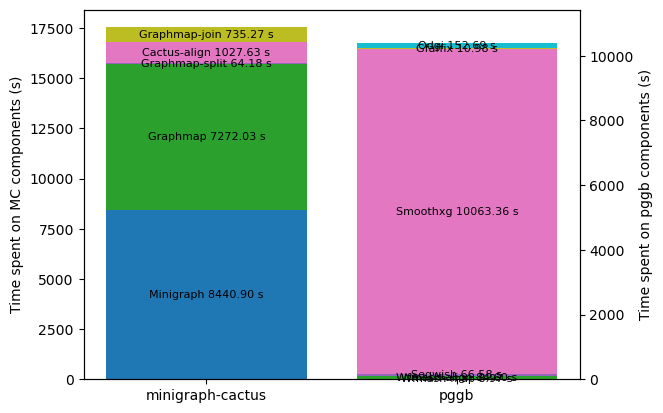

In [35]:
folder_path = '/home/yxxiang/data/pangenome/benchmark/result/dataset_6/'
bar_names = ["minigraph-cactus", "pggb"]
txt_files = [folder_path + "mc_16/TimeMemory.txt", 
             folder_path + "pggb_16/TimeMemorySegmentation.txt"]
plot_execution_times(txt_files, bar_names)

# 检查文件夹是否存在，如果不存在则创建它
if not os.path.exists(folder_path + '/pic'):
    os.makedirs(folder_path + '/pic')

plt.savefig(folder_path + 'pic/16_time.png', dpi=1000, bbox_inches='tight')
plt.show()

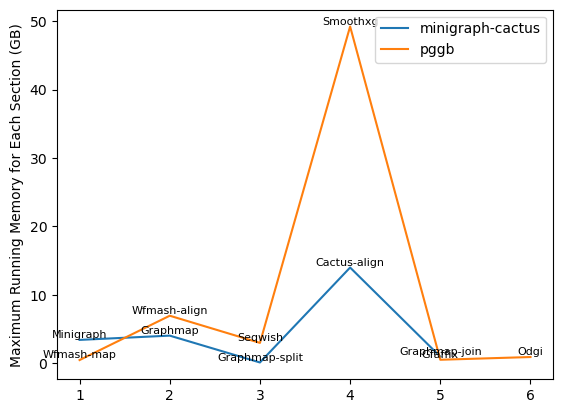

In [36]:
plot_memory_usage(txt_files, bar_names)
plt.savefig(folder_path + 'pic/16_memory.png', dpi=1000, bbox_inches='tight')
plt.show()